# Case Study:

With the following Transactional data from the previous year:
- Mention some strategies to increase sales in the Category. 
- What weight does each variable has on the sales? 
- Which variables should be given more importance? 
- How can we predict our sales? 

Data Source: Data randomly generated by me.

#### NOTE: The main ideas are in English and the code notes in Spanish. This is to show the proficency in both languages.

In [1]:
#Librerías necesarias

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import math

In [2]:
#Importar el data

df = pd.read_excel('TransaccionalResultadosCATCONS_b.xlsx')
pd.set_option('display.max_columns', None)

df

,CAT,ITEM NBR,ITEM DESC,PRECIO DE VENTA,PZAS VENDIDAS,CANAL DE COMPRA (MODA),TIPO DE PAGO (MODA),MIEMBRO APP CLIENTEFIEL (MODA),PROM MIN EN SESION,ANTIGDAD USUARIO (MESES) PROMEDIO,TRANSACTION ID,USER ID,SEMANA
0,CONSOLA,1005,CONS 2,9000,37.0,APP,DEBITO,NO,60.0,10,-,-,2
1,CONSOLA,1004,CONS 2 SLIM,8000,35.0,SITIO WEB,CREDITO,SI,60.0,2,-,-,2
2,CONSOLA,1008,CONS 3,6300,35.0,APP,CREDITO,NO,50.0,5,-,-,2
3,CONSOLA,1005,CONS 2,9000,32.0,APP,DEBITO,NO,64.0,4,-,-,3
4,CONSOLA,1005,CONS 2,9000,31.0,APP,CREDITO,SI,62.0,14,-,-,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,CONSOLA,1003,CONS 1 SLIM,10000,10.0,SITIO WEB,CREDITO,NO,20.0,2,-,-,4
59,CONSOLA,1001,CONS 1,11000,10.0,APP,DEBITO,SI,20.0,2,-,-,4
60,CONSOLA,1007,CONS 3 SLIM,6000,9.0,SITIO WEB,CREDITO,NO,18.0,4,-,-,1
61,CONSOLA,1003,CONS 1 SLIM,10000,9.0,APP,CREDITO,NO,18.0,1,-,-,1


In [3]:
# Para las columnas: PZAS VENDIDAS & PROM MIN EN SESION cambiar a valor entero

df['PROM MIN EN SESION '] = df['PROM MIN EN SESION '].astype(int)
df['PZAS VENDIDAS'] = df['PZAS VENDIDAS'].astype(int)

print(df.head())

       CAT  ITEM NBR    ITEM DESC  PRECIO DE VENTA  PZAS VENDIDAS  \
0  CONSOLA      1005       CONS 2             9000             37   
1  CONSOLA      1004  CONS 2 SLIM             8000             35   
2  CONSOLA      1008       CONS 3             6300             35   
3  CONSOLA      1005       CONS 2             9000             32   
4  CONSOLA      1005       CONS 2             9000             31   

  CANAL DE COMPRA (MODA) TIPO DE PAGO (MODA) MIEMBRO APP CLIENTEFIEL (MODA)  \
0                    APP              DEBITO                             NO   
1              SITIO WEB             CREDITO                             SI   
2                    APP             CREDITO                             NO   
3                    APP              DEBITO                             NO   
4                    APP             CREDITO                             SI   

   PROM MIN EN SESION   ANTIGDAD USUARIO (MESES) PROMEDIO TRANSACTION ID  \
0                   60            

### Explorar el PDF (Probability Density Function)

- Se busca que visualmente las variables Numéricas parezcan una Distribución Normal.
- Si no lo parecen, se pueden transformar los datos, como transformar una columna a logaritmo natural 
- Esta transformación a log es para que los valores más grandes se hagan cortos

Valor más bajo: 18
Valor más alto: 70


C:\Users\rou_27\AppData\Local\Temp\ipykernel_20128\1958888895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PROM MIN EN SESION '])


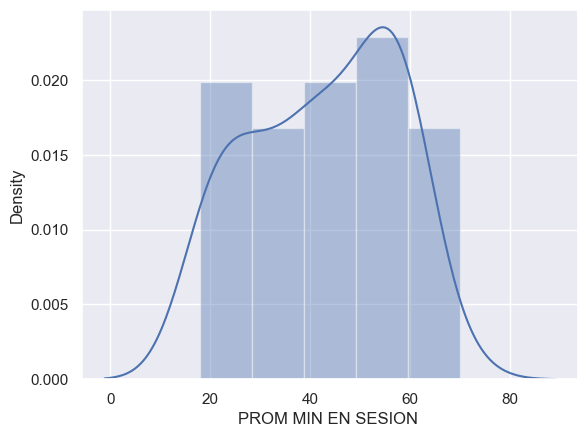

In [10]:
sns.distplot(df['PROM MIN EN SESION '])

# Encontrar el valor más bajo y el más alto
valor_minimo = df['PROM MIN EN SESION '].min()
valor_maximo = df['PROM MIN EN SESION '].max()

print("Valor más bajo:", valor_minimo)
print("Valor más alto:", valor_maximo)

In [13]:
# Transformar prom min en sesión a Logaritmo Natural ver si mejora la apariencia de la distribución
# después se agrega esta transformación a mi dataframe

log_minses = np.log(df['PROM MIN EN SESION '])
df['log_minses'] = log_minses

C:\Users\rou_27\AppData\Local\Temp\ipykernel_20128\340361616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_minses'])


<Axes: xlabel='log_minses', ylabel='Density'>

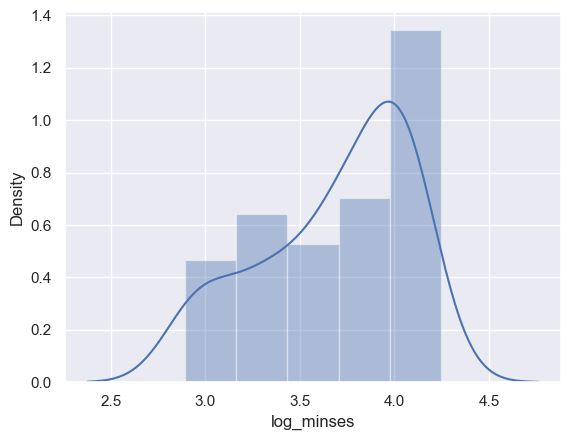

In [14]:
#Tiene una mejor forma. Parece Distribución Normal y antes una Distribución Uniforme

sns.distplot(df['log_minses'])

C:\Users\rou_27\AppData\Local\Temp\ipykernel_20128\4174521105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ANTIGDAD USUARIO (MESES) PROMEDIO'])


<Axes: xlabel='ANTIGDAD USUARIO (MESES) PROMEDIO', ylabel='Density'>

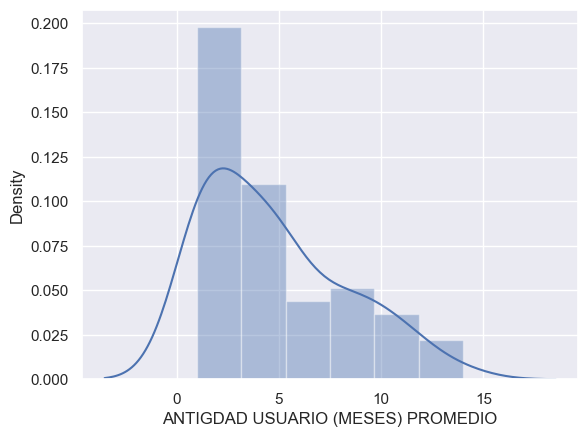

In [15]:
sns.distplot(df['ANTIGDAD USUARIO (MESES) PROMEDIO'])

C:\Users\rou_27\AppData\Local\Temp\ipykernel_20128\3436573009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRECIO DE VENTA'])


<Axes: xlabel='PRECIO DE VENTA', ylabel='Density'>

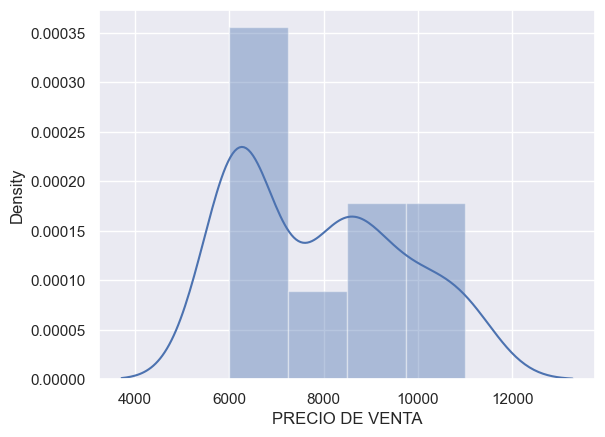

In [16]:
# Analizamos el Precio de Venta. Así podemos ver cómo están distribuidos los precios de nuestras Cateogrías

sns.distplot(df['PRECIO DE VENTA'])

## Regresión Lineal. Revisar que se cumplan las bases

### Regresión Lineal Mediante el Método OLS:

- Para hacer una Regresión Lineal necesitamos que haya una autocorrelación en nuestro dataset. Autocorrealción entre la variable que queremos predecir (ej. pzas vendidas) y una predictoria de nuestro dataset (ej. prom min en sesion) 
- A medida que aumenten o disminuya mi variable predictoria (X) mi variable a predecir (Y) aumente o disminuya.
- Se necesita conocimiento de la Categoría para saber que a medida los minutos en sesión aumenten lo hagan las ventas por ejemplo
- Se puede analizar esto último mediante un coeficiente de Autocorrelación
- Se debe ver si hay multicolinealidad (una variable explique otra o viceversa). Esto se ve mediante el VIF (Variance Inflation Frequency), un valor menor o igual a 5 es lo óptimo
- Si hay multicolnealidad lo mejor es no incluir esta variable porque nuestro modelo puede no tener las mejores predicciones.

### AUTOCORRELACIÓN 

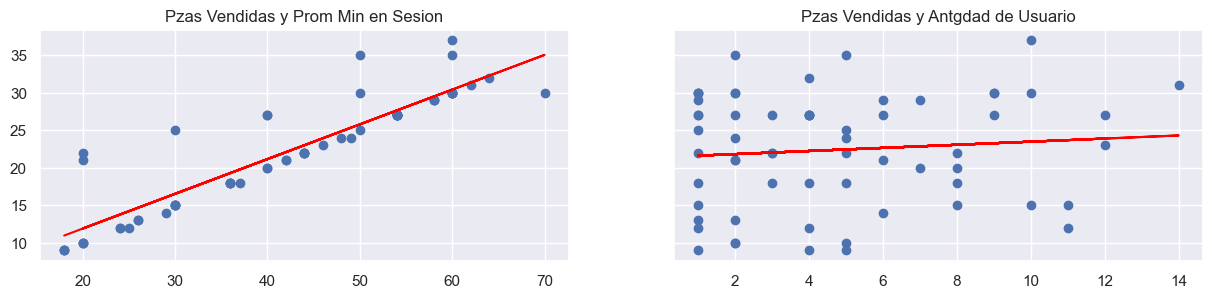

In [21]:
#De manera gráfica se exploran las relaciones que existe entre:
# Piezas Vendidas VS Minutos en Sesión. Así como Piezas Vendidas VS Antigüedad del usuario. 

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))

ax1.scatter(df['PROM MIN EN SESION '],df['PZAS VENDIDAS'])
ax1.set_title('Pzas Vendidas y Prom Min en Sesion')

ax2.scatter(df['ANTIGDAD USUARIO (MESES) PROMEDIO'],df['PZAS VENDIDAS'])
ax2.set_title('Pzas Vendidas y Antgdad de Usuario')


# Calcular y graficar la línea de tendencia para el primer subplot
x1 = df['PROM MIN EN SESION ']
y1 = df['PZAS VENDIDAS']
coef1 = np.polyfit(x1, y1, 1)  # Ajustar una línea polinómica de grado 1 (lineal)
linea_tendencia1 = coef1[0] * x1 + coef1[1]
ax1.plot(x1, linea_tendencia1, color='red', label='Línea de Tendencia')

# Calcular y graficar la línea de tendencia para el segundo subplot
x2 = df['ANTIGDAD USUARIO (MESES) PROMEDIO']
y2 = df['PZAS VENDIDAS']
coef2 = np.polyfit(x2, y2, 1)  # Ajustar una línea polinómica de grado 1 (lineal)
linea_tendencia2 = coef2[0] * x2 + coef2[1]
ax2.plot(x2, linea_tendencia2, color='red', label='Línea de Tendencia')


plt.show()

#### Se ve una clara autocorrrelación en la primer gráfica. No hay autocorrelación entre Antigüedad del Usuario y Piezas Vendidas

#### Lo podemos ver también con datos numéricos
- Autoccorrelación Positiva  +1
- Autoccorrelación Negativa -1
- Lo más lejos de 1 es que no hay Autocorrelación

In [22]:
#Mostrar que columnas tienen correlación. Método 1

numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

#Se ve una correlación fuerte entre Promedio Minutos en Sesión y Piezas Vendidas del 89%

                                       ITEM NBR  PRECIO DE VENTA  \
ITEM NBR                           1.000000e+00    -6.548857e-01   
PRECIO DE VENTA                   -6.548857e-01     1.000000e+00   
PZAS VENDIDAS                      1.944758e-01    -1.084403e-02   
PROM MIN EN SESION                 1.490680e-01     1.442572e-02   
ANTIGDAD USUARIO (MESES) PROMEDIO  5.202069e-02     1.027344e-02   
SEMANA                             5.252673e-15     7.518111e-17   
log_minses                         1.533528e-01    -3.046930e-02   

                                   PZAS VENDIDAS  PROM MIN EN SESION   \
ITEM NBR                                0.194476             0.149068   
PRECIO DE VENTA                        -0.010844             0.014426   
PZAS VENDIDAS                           1.000000             0.909010   
PROM MIN EN SESION                      0.909010             1.000000   
ANTIGDAD USUARIO (MESES) PROMEDIO       0.096019             0.129112   
SEMANA           

In [24]:
#Mostrar que columnas tienen correlación. Método 2
#Se ve una correlación fuerte (1) entre Promedio Minutos en Sesión y Piezas Vendidas

correlation_prom_min_sesion = np.corrcoef(df['log_minses'], df['PZAS VENDIDAS'])[0, 1]
correlation_antig_usuario = np.corrcoef(df['ANTIGDAD USUARIO (MESES) PROMEDIO'], df['PZAS VENDIDAS'])[0, 1]

print("Correlación entre Pzas Vendidas y Prom Min en Sesion:", correlation_prom_min_sesion)
print("Correlación entre Pzas Vendidas y Antigüedad de Usuario:", correlation_antig_usuario)

Correlación entre Pzas Vendidas y Prom Min en Sesion: 0.8971418035092773
Correlación entre Pzas Vendidas y Antigüedad de Usuario: 0.09601932829133863


### MULTICOLINEALIDAD

In [25]:
df.describe()

,ITEM NBR,PRECIO DE VENTA,PZAS VENDIDAS,PROM MIN EN SESION,ANTIGDAD USUARIO (MESES) PROMEDIO,SEMANA,log_minses
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1005.000000,7933.333333,22.396825,42.666667,4.746032,4.000000,3.684540
std,2.602728,1742.078847,7.456410,14.633148,3.454629,2.016065,0.392389
min,1001.000000,6000.000000,9.000000,18.000000,1.000000,1.000000,2.890372
25%,1003.000000,6300.000000,16.500000,30.000000,2.000000,2.000000,3.401197
50%,1005.000000,8000.000000,23.000000,44.000000,4.000000,4.000000,3.784190
75%,1007.000000,9000.000000,28.000000,54.000000,7.000000,6.000000,3.988984
max,1009.000000,11000.000000,37.000000,70.000000,14.000000,7.000000,4.248495


In [29]:
# Aquí se busca ver el VIF, lo óptimo es que sean valores entre 2 y 5
# VIF explica la Multicolinealida, que una variable explique o sea explicada por otra.
# Siempre habrá multicolinealidad si incluimos la variable a predecir (Y) pues es explicada por las predictorias (x)

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[['ITEM NBR','PRECIO DE VENTA','ANTIGDAD USUARIO (MESES) PROMEDIO','SEMANA ','PROM MIN EN SESION ']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

vif


# Notas personales, ignorar:

#variables = df[['PZAS VENDIDAS','ANTIGDAD USUARIO (MESES) PROMEDIO','PROM MIN EN SESION ', 'PRECIO DE VENTA', 'ITEM NBR', 'SEMANA ']]
#'PZAS VENDIDAS' ... No se checa el VIF de este pues es la variable Y (a predecir)
#'SEMANA ' ... se quita porque da un mejor modelo
#'ITEM NBR',

,VIF,Features
0,32.515845,ITEM NBR
1,21.743152,PRECIO DE VENTA
2,3.184768,ANTIGDAD USUARIO (MESES) PROMEDIO
3,5.547741,SEMANA
4,10.060315,PROM MIN EN SESION


### EXPLICACIÓN:
- ITEM NBR; presenta multicolinealidad, no lo incluiremos porque para saber el item usaremos la variable ITEM DESC.
- Precio de Venta; presenta multicolinealidad, no lo incluiremos porque buscaremos predecir por ITEM DESC no por precio.
- PROM MIN EN SESION presenta multicolinealidad,pero lo dejo porque es la variable que usaré por predecir 

In [30]:
# Chequo sin estas variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[['ANTIGDAD USUARIO (MESES) PROMEDIO','SEMANA ','log_minses']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

vif

,VIF,Features
0,3.182780,ANTIGDAD USUARIO (MESES) PROMEDIO
1,5.578979,SEMANA
2,6.018634,log_minses


In [ ]:
# vemos un VIF de log_minses (que es la que usaremos) de 6, no está tan alta. Parece tener ligera autocorrelación con SEMANA.
# las mantenemos porque ambas son necesarias para el análisis

## Regresión Lineal. Preparación de dataset

#### Eliminación de Columnas

In [186]:
# Ver cuáles son las columnas, para después quitar las que no usaremos

df.columns.values

array(['CAT', 'ITEM NBR', 'ITEM DESC', 'PRECIO DE VENTA', 'PZAS VENDIDAS',
       'CANAL DE COMPRA (MODA)', 'TIPO DE PAGO (MODA)',
       'MIEMBRO APP CLIENTEFIEL (MODA)', 'PROM MIN EN SESION ',
       'ANTIGDAD USUARIO (MESES) PROMEDIO', 'TRANSACTION ID', 'USER ID',
       'SEMANA ', 'log_minses'], dtype=object)

In [187]:
df

,CAT,ITEM NBR,ITEM DESC,PRECIO DE VENTA,PZAS VENDIDAS,CANAL DE COMPRA (MODA),TIPO DE PAGO (MODA),MIEMBRO APP CLIENTEFIEL (MODA),PROM MIN EN SESION,ANTIGDAD USUARIO (MESES) PROMEDIO,TRANSACTION ID,USER ID,SEMANA,log_minses
0,CONSOLA,1005,CONS 2,9000,37,APP,DEBITO,NO,60,10,-,-,2,4.09
1,CONSOLA,1004,CONS 2 SLIM,8000,35,SITIO WEB,CREDITO,SI,60,2,-,-,2,4.09
2,CONSOLA,1008,CONS 3,6300,35,APP,CREDITO,NO,50,5,-,-,2,3.91
3,CONSOLA,1005,CONS 2,9000,32,APP,DEBITO,NO,64,4,-,-,3,4.16
4,CONSOLA,1005,CONS 2,9000,31,APP,CREDITO,SI,62,14,-,-,5,4.13
5,CONSOLA,1006,CONS 2 BDLE,8500,30,APP,CREDITO,NO,70,9,-,-,7,4.25
6,CONSOLA,1009,CONS 3 BDLE,6300,30,SITIO WEB,DEBITO,NO,60,9,-,-,6,4.09
7,CONSOLA,1009,CONS 3 BDLE,6300,30,APP,DEBITO,SI,60,1,-,-,7,4.09
8,CONSOLA,1008,CONS 3,6300,30,SITIO WEB,DEBITO,NO,60,2,-,-,3,4.09
9,CONSOLA,1006,CONS 2 BDLE,8500,30,APP,DEBITO,SI,60,1,-,-,2,4.09


In [188]:
# Para el modelo se deberán quitar las columnas que no serán usadas: 

# Esta parte es crucial, pues agregando o quitando columnas estratégicas da mejores predicciones en el modelo.
# La filosofía es "less is more", que las menores características expliquen un mayor panorama.


df_dropMC = df.drop(['CAT',
                    'ITEM NBR',
                    'PRECIO DE VENTA',
                     #'PZAS VENDIDAS',
                     #'CANAL DE COMPRA (MODA)',
                     #'TIPO DE PAGO (MODA)',
                     #'MIEMBRO APP CLIENTEFIEL (MODA)',
                     'PROM MIN EN SESION ', #lo borro porque usaré su columna con valor logaritmico
                     #'ANTIGDAD USUARIO (MESES) PROMEDIO',
                     'TRANSACTION ID',
                     'USER ID',
                     #'SEMANA ', #Si se elimina esta columna, se obtienen ligeramente mejores predicciones
                     #'log_minses',                                                 
                    ],axis=1)
df_dropMC

,ITEM DESC,PZAS VENDIDAS,CANAL DE COMPRA (MODA),TIPO DE PAGO (MODA),MIEMBRO APP CLIENTEFIEL (MODA),ANTIGDAD USUARIO (MESES) PROMEDIO,SEMANA,log_minses
0,CONS 2,37,APP,DEBITO,NO,10,2,4.09
1,CONS 2 SLIM,35,SITIO WEB,CREDITO,SI,2,2,4.09
2,CONS 3,35,APP,CREDITO,NO,5,2,3.91
3,CONS 2,32,APP,DEBITO,NO,4,3,4.16
4,CONS 2,31,APP,CREDITO,SI,14,5,4.13
5,CONS 2 BDLE,30,APP,CREDITO,NO,9,7,4.25
6,CONS 3 BDLE,30,SITIO WEB,DEBITO,NO,9,6,4.09
7,CONS 3 BDLE,30,APP,DEBITO,SI,1,7,4.09
8,CONS 3,30,SITIO WEB,DEBITO,NO,2,3,4.09
9,CONS 2 BDLE,30,APP,DEBITO,SI,1,2,4.09


#### Dummies (Convertir variables de texto en numéricas)

In [189]:
# Al transformar en dummies, digamos para TIPO DE PAGO tenemos dos variables DEBITO y CREDITO, se convertirán a número (0 y 1)
# Si hay columnas con más de dos variables se debe eliminar una de estas.

In [191]:
# Obtener las frecuencias de cada categoría en las columnas de Texto
# Identificar la categoría menos frecuente en cada columna (la menos frecuente se eliminará)

frecuencias_genero = df_dropMC['CANAL DE COMPRA (MODA)'].value_counts()
frecuencias_nombre = df_dropMC['MIEMBRO APP CLIENTEFIEL (MODA)'].value_counts()
frecuencias_tipo = df_dropMC['ITEM DESC'].value_counts()
frecuencias_pago = df_dropMC['TIPO DE PAGO (MODA)'].value_counts()

categoria_menos_frecuente_genero = frecuencias_genero.idxmin()
categoria_menos_frecuente_nombre = frecuencias_nombre.idxmin()
categoria_menos_frecuente_tipo = frecuencias_tipo.idxmin()
categoria_menos_frecuente_pago = frecuencias_pago.idxmin()

# Crear variables dummy para todas las categorías
data_with_dummies = pd.get_dummies(df_dropMC, columns=['CANAL DE COMPRA (MODA)', 
                                                       'MIEMBRO APP CLIENTEFIEL (MODA)', 
                                                       'ITEM DESC',
                                                       'TIPO DE PAGO (MODA)'
                                                      ])


# Eliminar la columna correspondiente a la categoría menos frecuente de las variables dummy
columnas_a_eliminar = [
    'CANAL DE COMPRA (MODA)_' + categoria_menos_frecuente_genero,
    'MIEMBRO APP CLIENTEFIEL (MODA)_' + categoria_menos_frecuente_nombre,
    'ITEM DESC_' + categoria_menos_frecuente_tipo,
    'TIPO DE PAGO (MODA)_' + categoria_menos_frecuente_pago
    
]

data_with_dummies.drop(columnas_a_eliminar, axis=1, inplace=True)
data_with_dummies

,PZAS VENDIDAS,ANTIGDAD USUARIO (MESES) PROMEDIO,SEMANA,log_minses,CANAL DE COMPRA (MODA)_APP,MIEMBRO APP CLIENTEFIEL (MODA)_NO,ITEM DESC_CONS 1,ITEM DESC_CONS 1 BDLE,ITEM DESC_CONS 1 SLIM,ITEM DESC_CONS 2 BDLE,ITEM DESC_CONS 2 SLIM,ITEM DESC_CONS 3,ITEM DESC_CONS 3 BDLE,ITEM DESC_CONS 3 SLIM,TIPO DE PAGO (MODA)_CREDITO
0,37,10,2,4.09,True,True,False,False,False,False,False,False,False,False,False
1,35,2,2,4.09,False,False,False,False,False,False,True,False,False,False,True
2,35,5,2,3.91,True,True,False,False,False,False,False,True,False,False,True
3,32,4,3,4.16,True,True,False,False,False,False,False,False,False,False,False
4,31,14,5,4.13,True,False,False,False,False,False,False,False,False,False,True
5,30,9,7,4.25,True,True,False,False,False,True,False,False,False,False,True
6,30,9,6,4.09,False,True,False,False,False,False,False,False,True,False,False
7,30,1,7,4.09,True,False,False,False,False,False,False,False,True,False,False
8,30,2,3,4.09,False,True,False,False,False,False,False,True,False,False,False
9,30,1,2,4.09,True,False,False,False,False,True,False,False,False,False,False


# Regresión Lineal

#### Conforme se hace el modelo de Regresión Lineal. Para mejorar las predicciones se pueden transformar valores a Log, quitar columnas con mucha multicolnealidad o eliminar outliers (datos anómalos).

#### Puede que eliminando datos clave se tengan mejores predicciones. En este ejemplo hay mejores predicciones si quitamos SEMANA. Pero si se quiere ver como será la venta a través del tiempo es buena idea mantenerlo, aún si implica tener ligeramente menos poder predictivo.

### Pre Procesamiento (División en Training/Testing y Normalización)

In [192]:
#  Dividimos el dataset en training y testing (70/30). Training se hace el modelo, testing se ve si lo hicimos bien

In [193]:
# Target es lo que queremos predecir ó variable dependiente (Y)
# input las variables que usaremos para predecir (X)

targets = data_with_dummies['PZAS VENDIDAS']
inputs = data_with_dummies.drop(['PZAS VENDIDAS'],axis=1)

In [194]:
# Estandarización

In [195]:
# Scale the Data / Normalizar los datos. Para que las columnas con grandes y pequeñas magnitudes estén en un rango comparable


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(inputs)

inputs_scaled = scaler.transform(inputs)

In [196]:
# Dividir en 80/20 (70 para entrenar el modelo / 30 para testear que tan bueno es)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.3, random_state=365)

## Creamos la Regresión

In [197]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

## Resultados de la Regresión Lineal: 

In [163]:
#Cuando comparamos nuestro modelo debemos analizar el R2 ajustado, a mayor valor generalmente mejor modelo.
#Es solo un indicador, debemos fiarnos más por nuestras predicciones sobre el dataset de prueba

In [198]:
#R2adj del modelo
r2 = reg.score(x_train,y_train)

n=x_train.shape[0]
p=x_train.shape[1]

adj_r2 =1-(1-r2) * (n-1)/(n-p-1)
adj_r2

#Nota Personal: #R2 del modelo
#reg.score(x_train,y_train)

0.7226672694244538

In [222]:
# Resultados Dataset de Prueba, Predicciones vs Valores Reales. Se verá a fondo más adelante
# "Mean", en promedio hay una diferencia del 13% de diferencia en lo que predecimos vs lo real.
# La desviación estándar "std" o variabilidad. Si predice el modelo venderemos 46 pzas, 
#                   El resultado puede tener una variablidad del 12% (venta total de +/- 5 pzas.)
df_pf.describe().round(2)

,Prediction,Target,Residual,Difference%
count,19.00,19.00,19.00,19.00
mean,21.33,20.58,-0.75,13.39
std,7.80,8.87,3.42,12.19
min,9.65,9.00,-4.97,0.27
25%,13.51,12.00,-2.87,5.59
50%,22.85,21.00,-1.29,8.89
75%,28.48,27.00,-0.08,16.77
max,31.97,35.00,9.01,46.00


### 1. Ecuación de Regresión Lineal   (Yhat = b0 + b1 x1 + bn xn)

### Se obtendrán los Bias y los Weigths:

- B/ Bias/ Intercept: Es donde inicia la Regresión lineal, cuando X vale 0
- W/ Weigths/ Coeficientes: Es el peso que tiene cada variable en la predicción, un valor cercano a 0 significa menor peso en la predicción. Un valor Negativo, a medida que existe o aumenta esta variable nuestro valor a predecir disminuye. 

Ejemplo:

- Piezas Vendidas (Y) es mi variable dependiente. Lo que quiero predecir.
- Semana (X) es una de mis variables independientes. Una de las que uso para predecir.

Interpretación:
- Semana -0.69
- A medida que pasen las semanas, las piezas vendidas disminuirán su probabilidad de venta en -0.69 unidades.

In [199]:
# Obtener el B (Bias o intecept) del modelo

reg.intercept_

22.623237960373825

In [200]:
# Obtener los W (weights ó coeficientes) del modelo
# Se entiende como por cada valor unitario (1) que aumente mi variable independiente,
# la variable dependiente lo hará en n cantidades.

#Ejemplo:
# SEMANA es -0.23, a medida que pasen las semanas, las piezas vendidas disminuirán su probabilidad de venta en -0.23 unidades.


reg.coef_

array([-0.05659714, -0.69305754,  6.39000055,  0.17455782,  0.30550167,
       -0.46202545, -0.89101499,  0.82255557, -0.46966941,  0.37915898,
       -0.28086256,  0.21327044, -0.13946649, -0.88389944])

In [201]:
#obtener los features (variables predictorias) y weights (sus valores)

reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_.round(2)
reg_summary

,Features,Weights
0,ANTIGDAD USUARIO (MESES) PROMEDIO,-0.06
1,SEMANA,-0.69
2,log_minses,6.39
3,CANAL DE COMPRA (MODA)_APP,0.17
4,MIEMBRO APP CLIENTEFIEL (MODA)_NO,0.31
5,ITEM DESC_CONS 1,-0.46
6,ITEM DESC_CONS 1 BDLE,-0.89
7,ITEM DESC_CONS 1 SLIM,0.82
8,ITEM DESC_CONS 2 BDLE,-0.47
9,ITEM DESC_CONS 2 SLIM,0.38


In [ ]:
# El valor con más peso son los minutos en sesión (6.39). A mayor promedio de minutos en sesión las piezas vendidas aumentan.
# El valor con menos peso es ANTIGDAD USUARIO (MESES) PROMEDIO,con un valor de -0.06, a medida que aumentan los meses que
# un usuario está registrado las piezas vendidas disminuyen, Quiere decir nuestros clientes más recientes compran más.

In [127]:
# Para el siguiente ejemplo convertiré en logaritmo natural mis minutos.

min_sesion = 30  # Valor en minutos
log_min_sesion = math.log(min_sesion)  # Transformación a logaritmo

print("Logaritmo natural de 30 minutos:", log_min_sesion)

Logaritmo natural de 30 minutos: 3.4011973816621555


### Caso Práctico:

Supongamos que queremos calcular cuántas Piezas se Venderán con con estos valores:

- INTERCEPTO = 22.62

- ANTIGDAD_USUARIO = 8 (meses)
- SEMANA = 3
- log_minses = 3.4 (valor logarítmico de 30 minutos)
- CANAL_DE_COMPRA_APP = 1 (si es App, de lo contrario 0)
- MIEMBRO_APP_CLIENTEFIEL_NO = 0 (no es miembro)
- ITEM_DESC_CONS_1 = 1
- ITEM_DESC_CONS_1_BDLE = 0
- ITEM_DESC_CONS_1_SLIM = 0
- ITEM_DESC_CONS_2_BDLE = 0
- ITEM_DESC_CONS_2_SLIM = 0
- ITEM_DESC_CONS_3 = 0
- ITEM_DESC_CONS_3_BDLE = 0
- ITEM_DESC_CONS_3_SLIM = 0
- TIPO_DE_PAGO_CREDITO = 1 (si es crédito, de lo contrario 0)


#### La ecuación: 

- Yhat = B0 + B1 X1 + Bn Xn


In [220]:
# La ecuación

yhat = 22.62 + (8*.06) + (3*.069) + (3.4*6.39) + (1*0.17) + (1*0.46)
yhat_ = round(yhat,0)
yhat_

46.0

### La Interpetación:

- 46 Piezas vendidas de 'Cons 1'  para la semana 3 si los usuarios están en promedio 30 minutos en sesión, con una cuenta de 8 meses y la compra se hace a través de la App. 

- El resultado puede tener una variablidad del 12% (venta total de +/- 5 pzas.)
- Significa puede vender como mínimo 41 ó 51 pzas

### 2. Analizamos los resultados de Datos Training

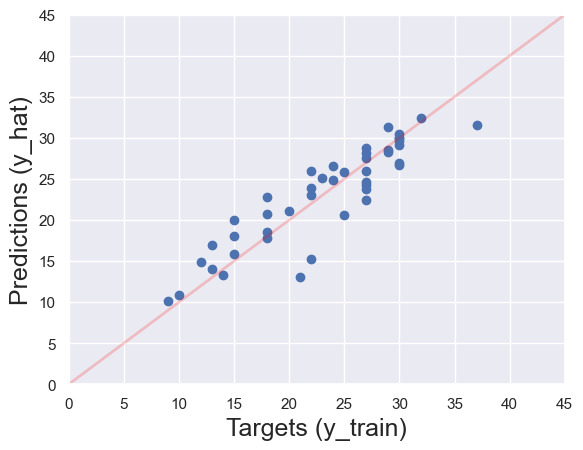

In [221]:
# Predicciones Training Data

# Se busca que las predicciones estén lo más cercana a la línea de 45°
# Mediante el dataset de entrenamiento (Train) se ve lo que predice mi modelo vs los valores que son en realidad

# trazar los puntos de dispersión
plt.scatter(y_train, y_hat)

# Trazar una línea roja para mostrar la tendencia
plt.plot([0, 45], [0, 45], color='red', linestyle='-', linewidth=2, alpha=0.2)

#etiquetas y límites del gráfico
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(0,45)
plt.ylim(0,45)
plt.show()

C:\Users\rou_27\AppData\Local\Temp\ipykernel_20128\3964746183.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

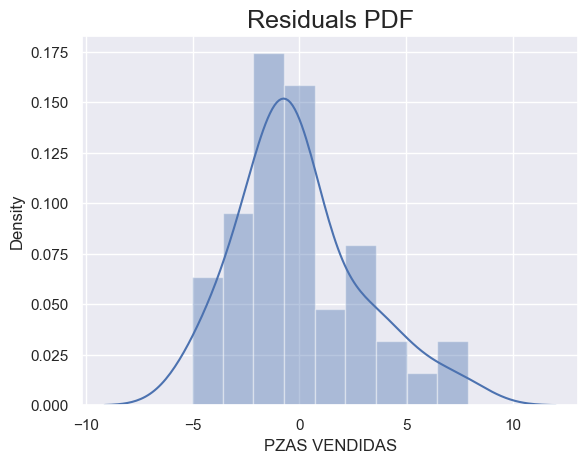

In [203]:
# Ver que mi comparación entre datos entrenamiento y prueba muestren lo más similar a una distribución normal

sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [202]:
# Los resultados del dataset de entrenamiento
y_hat = reg.predict(x_train)
y_hat

array([31.32427451, 22.80219532, 14.02541113, 17.81436797, 20.02420926,
       24.67603593, 30.03078412, 28.72065818, 13.32664583, 27.59778399,
       28.2333616 , 24.8589862 , 28.12266853, 23.74840707, 21.06128649,
       10.13111633, 30.49929177, 14.92005074, 24.296478  , 31.56526934,
       10.87063576, 30.02272925, 28.49591639, 26.99710713, 26.66839969,
       20.72823916, 13.10830619, 32.37727022, 26.60747406, 25.15533828,
       22.99939711, 20.60146999, 18.05782797, 15.25513256, 22.41620903,
       29.59032668, 15.90366834, 25.99408766, 29.1117529 , 18.50408361,
       25.87587044, 23.94320055, 16.95129626, 25.98497847])

### 3. Analizamos los resultados de Datos (Testing)

In [205]:
# Predicciones Testing Data

In [206]:
y_hat_test = reg.predict(x_test)

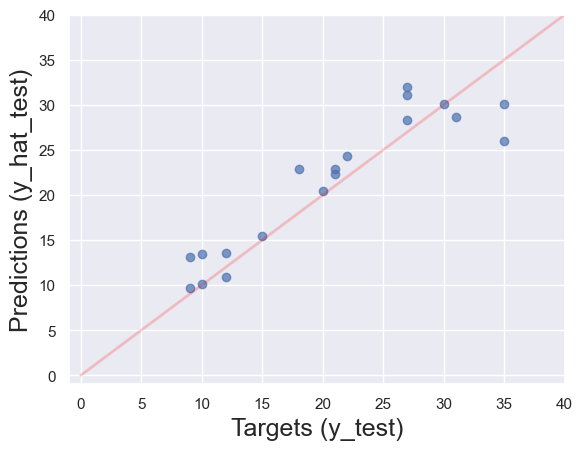

In [207]:
# Se busca que las predicciones estén lo más cercana a la línea de 45°
# Mediante el dataset de prueba (Testing) se ve lo que predice mi modelo vs los valores que son en realidad

plt.scatter(y_test, y_hat_test, alpha=0.7)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(-1,40)
plt.ylim(-1,40)

# Trazar una línea roja para mostrar la tendencia
plt.plot([0, 45], [0, 45], color='red', linestyle='-', linewidth=2, alpha=0.2)


plt.show()

In [208]:
# Ver las Predicciones para mi dataset de Testing
# Ver el valor real que deberían tener mis predicciones

df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])

df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,13.14,NaN
1,20.45,35.00
2,28.36,35.00
3,25.99,NaN
4,31.08,31.00
5,13.44,NaN
6,13.59,NaN
7,10.07,NaN
8,22.87,30.00
9,15.44,NaN


In [209]:
# Como aparece NaN en a algunos se reseterará el index

y_test = y_test.reset_index(drop=True)
y_test.head()

0     9
1    20
2    27
3    35
4    27
Name: PZAS VENDIDAS, dtype: int32

In [210]:
# Ver las Predicciones para mi dataset de Testing
# Ver el valor real que deberían tener mis predicciones

df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,13.14,9
1,20.45,20
2,28.36,27
3,25.99,35
4,31.08,27
5,13.44,10
6,13.59,12
7,10.07,10
8,22.87,21
9,15.44,15


In [211]:
# Analizar a Profundidad, viendo el Residual y la Diferencia en porcentaje

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,13.14,9,-4.14,46.00
1,20.45,20,-0.45,2.27
2,28.36,27,-1.36,5.05
3,25.99,35,9.01,25.75
4,31.08,27,-4.08,15.12
5,13.44,10,-3.44,34.39
6,13.59,12,-1.59,13.22
7,10.07,10,-0.07,0.74
8,22.87,21,-1.87,8.89
9,15.44,15,-0.44,2.96


In [212]:
# Ver de mis predicciones cuál es la desviación stdr, la predicción con diferencia más grande, etc...

df_pf.describe().round(2)

,Prediction,Target,Residual,Difference%
count,19.00,19.00,19.00,19.00
mean,21.33,20.58,-0.75,13.39
std,7.80,8.87,3.42,12.19
min,9.65,9.00,-4.97,0.27
25%,13.51,12.00,-2.87,5.59
50%,22.85,21.00,-1.29,8.89
75%,28.48,27.00,-0.08,16.77
max,31.97,35.00,9.01,46.00


In [70]:
# Observar todas mis predicciones y ver una por una que tan bueno es el modelo

pd.options.display.max_rows = 999

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%']).round(2)

,Prediction,Target,Residual,Difference%
18,30.08,30,-0.08,0.27
7,10.07,10,-0.07,0.74
1,20.45,20,-0.45,2.27
9,15.44,15,-0.44,2.96
2,28.36,27,-1.36,5.05
13,22.29,21,-1.29,6.12
10,9.65,9,-0.65,7.27
11,28.60,31,2.40,7.76
15,10.95,12,1.05,8.74
8,22.87,21,-1.87,8.89


In [71]:
# Ordenar el DataFrame original por la columna "Prediction" de menor a mayor
df_sorted = df_pf.sort_values(by=['Target'])

# Imprimir el nuevo DataFrame ordenado
df_sorted

,Prediction,Target,Residual,Difference%
0,13.14,9,-4.14,46.00
10,9.65,9,-0.65,7.27
7,10.07,10,-0.07,0.74
5,13.44,10,-3.44,34.39
15,10.95,12,1.05,8.74
6,13.59,12,-1.59,13.22
9,15.44,15,-0.44,2.96
17,22.85,18,-4.85,26.95
1,20.45,20,-0.45,2.27
8,22.87,21,-1.87,8.89


In [63]:
#checar el nivel de significancia, r2, r2 ajustado entre otros. Si queremos ver en formato resumen

import statsmodels.api as sm


X_train_with_intercept = sm.add_constant(x_train)
modelo_stats = sm.OLS(y_train, X_train_with_intercept)
resultado = modelo_stats.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          PZAS VENDIDAS   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     91.94
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           3.83e-20
Time:                        01:30:04   Log-Likelihood:                -61.804
No. Observations:                  44   AIC:                             153.6
Df Residuals:                      29   BIC:                             180.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1039      0.207    106.851      0.0

# Insights 

- For our results is important to check the ones from our testing Dataset, we have a good model overall. 
- If we want to get better predictions data with lots of variations is always good, also more data. A good thing could be not divide in weeks but in days. However we have to check if the numbers (sold items/ piezas vendidas) doesn't become too low.
- Sometimes we have to trade, in case we want to use certain features (predict choosing weeks) may give us lower prediction power, however if we still want to know the sales in a specific week for example we have to keep in mmind that our results can have more variability. 

## Which weight does each variable has on our sales? 


- The weitghts are sorted. from more to least weight. 
- The interpretation is: the ones which are closer to 0 have little to no power in the prediction of our sales.
- Poisitve numbers mean that while this variable increases so does our sales.
- Negative numbers, the more our variable increases our sales decreases

## Give some strategies

- With the understanding in the Weights. The ones in the center (with index 3,0,12) have little to no prediction power. We shouldn't focus that much on our "Canal de Compra_app", "Antiguedad(meses) promedio", "item desc_cons 3 slim".

### The Negatives: 

- So we have to focus more on "Semana", "Tipo de pago(moda)_credito", "item desc_cons1 bdle". These variables means our pieces are likely to NOT be sold. 
- Semana / Week, the more weeks go by our sales decrese. So we better capitalize on having better promos and agressive strategies in the first weeks.
- Why are our clients not using credit?, our products are much more expensive?, we don't have that much credit options as out competitors? this can be risky. 
- The Console 1 Bundle is likely to not be sold, is the category ok with this?. The competitors give better price options?, give better taxonomy/ keywords to improve our sales.


### The Positives: 

- The more minutes go by, our chances to sale increases. Let's give a good crosselling and upselling options.
- Our items console 1 slim and console 2 slim are likely to be sold. Which means these items were key in the last event, are we having the same promotions than last year?, what promos were used?, taxonomy and keywords. Let's check what we did with these items the last time.

In [225]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_.round(2)
reg_summary_sorted = reg_summary.sort_values(by='Weights', ascending=False)
reg_summary_sorted

,Features,Weights
2,log_minses,6.39
7,ITEM DESC_CONS 1 SLIM,0.82
9,ITEM DESC_CONS 2 SLIM,0.38
4,MIEMBRO APP CLIENTEFIEL (MODA)_NO,0.31
11,ITEM DESC_CONS 3 BDLE,0.21
3,CANAL DE COMPRA (MODA)_APP,0.17
0,ANTIGDAD USUARIO (MESES) PROMEDIO,-0.06
12,ITEM DESC_CONS 3 SLIM,-0.14
10,ITEM DESC_CONS 3,-0.28
5,ITEM DESC_CONS 1,-0.46


####  Above we see a table, log_minses is the logaritmic version of our variable "Minutos en sesion", I noticed that if transformed it into a logaritmic version I will get better predictions.